In [63]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, make_scorer, fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

In [64]:
df = pd.read_csv("C:/Users/Yusuf/datasets/sepsis/Dataset.csv")

# Exploratory Data Analysis

In [65]:
df.head(10)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,NaN,121.0,74.0,91.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,NaN,120.0,79.0,98.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


In [66]:
df.tail(10)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
1552200,16,16,89.0,96.0,NaN,152.0,127.0,113.0,24.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,17,0,113911
1552201,17,17,67.0,100.0,NaN,198.0,118.0,82.0,24.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,18,0,113911
1552202,18,18,65.0,100.0,NaN,181.0,110.0,77.0,22.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,19,0,113911
1552203,19,19,82.5,100.0,36.1,156.5,91.5,66.0,24.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,20,0,113911
1552204,20,20,97.0,100.0,NaN,116.0,84.0,58.0,22.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,21,0,113911
1552205,21,21,83.0,99.0,NaN,121.0,77.0,54.0,22.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,22,0,113911
1552206,22,22,80.0,92.0,NaN,102.0,73.0,51.0,24.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,23,0,113911
1552207,23,23,95.0,97.0,36.7,128.5,83.0,58.5,25.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,24,0,113911
1552208,24,24,104.0,99.0,NaN,127.0,85.0,59.0,24.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,25,0,113911
1552209,25,25,94.5,99.0,NaN,112.0,81.0,56.0,22.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,26,0,113911


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [68]:
df.describe()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.552210e+06,1.552210e+06,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,...,10242.000000,92209.000000,1.552210e+06,1.552210e+06,940250.000000,940250.000000,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,2.549274e+01,2.549274e+01,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,...,287.385706,196.013911,6.200947e+01,5.592690e-01,0.496571,0.503429,-5.612512e+01,2.699499e+01,1.798468e-02,5.920148e+04
std,2.888256e+01,2.888256e+01,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,...,153.002908,103.635366,1.638622e+01,4.964749e-01,0.499989,0.499989,1.622569e+02,2.900542e+01,1.328956e-01,5.024819e+04
min,0.000000e+00,0.000000e+00,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,...,34.000000,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,9.000000e+00,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,...,184.000000,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00,9.990000e+03
50%,1.900000e+01,1.900000e+01,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,...,250.000000,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00,1.996500e+04
75%,3.300000e+01,3.300000e+01,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,...,349.000000,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,1.098780e+05
max,3.350000e+02,3.350000e+02,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,...,1760.000000,2322.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00,1.200000e+05


In [69]:
df['Patient_ID'].nunique()

40336

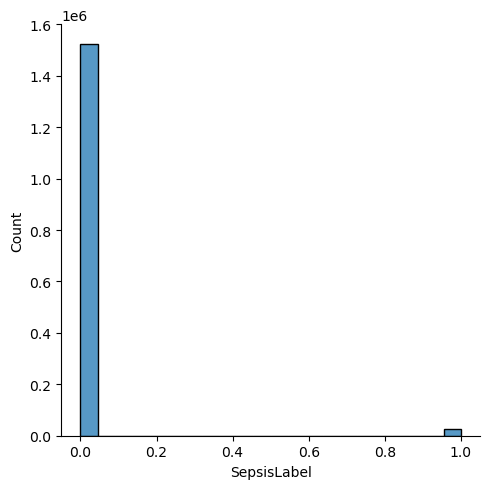

In [70]:
sns.displot(df["SepsisLabel"])
plt.show()

In [71]:
df["SepsisLabel"].value_counts()

0    1524294
1      27916
Name: SepsisLabel, dtype: int64

In [72]:
null_values = df.isnull().sum()
null_values = null_values / len(df)*100
null_values = null_values.sort_values(ascending=False)
null_values

Bilirubin_direct    99.807371
Fibrinogen          99.340167
TroponinI           99.047745
Bilirubin_total     98.509158
Alkalinephos        98.393194
AST                 98.377604
Lactate             97.329872
PTT                 97.055875
SaO2                96.549372
EtCO2               96.286843
Phosphate           95.986303
HCO3                95.810618
Chloride            95.460279
BaseExcess          94.579020
PaCO2               94.440121
Calcium             94.116067
Platelets           94.059502
Creatinine          93.904433
Magnesium           93.689578
WBC                 93.593199
BUN                 93.134434
pH                  93.069688
Hgb                 92.617558
FiO2                91.665754
Hct                 91.145979
Potassium           90.689082
Glucose             82.894325
Temp                66.162697
Unit2               39.425078
Unit1               39.425078
DBP                 31.345887
Resp                15.354559
SBP                 14.576958
O2Sat     

In [76]:
corr_matrix = df.corr()
corr_matrix["SepsisLabel"].sort_values(ascending=False)

SepsisLabel         1.000000
ICULOS              0.133774
Unnamed: 0          0.133755
Hour                0.133755
Bilirubin_direct    0.058411
BUN                 0.053469
HR                  0.048987
Fibrinogen          0.048238
Temp                0.048160
Bilirubin_total     0.047631
Resp                0.046304
WBC                 0.037615
Creatinine          0.028533
Unit1               0.025412
Phosphate           0.019985
PTT                 0.017475
PaCO2               0.014735
BaseExcess          0.014729
Alkalinephos        0.013465
SaO2                0.009986
Gender              0.009280
Glucose             0.008439
AST                 0.007804
TroponinI           0.007461
Lactate             0.007031
Magnesium           0.006211
Potassium           0.005856
Age                 0.000191
FiO2               -0.000043
pH                 -0.004636
O2Sat              -0.009338
Chloride           -0.010375
Platelets          -0.012017
SBP                -0.013375
HCO3          

# Data Preprocessing

MISSING VALUES

Missing data should be imputed on a patient basis since the dataset consists of time series. The bfill (backward fill) and ffill (forward fill) methods should be used for this imputation.

In [77]:
df[df.columns] = df.groupby('Patient_ID')[df.columns].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill'))

In [78]:
null_values = df.isnull().sum()
null_values = null_values / len(df)*100
null_values = null_values.sort_values(ascending=False)
null_values

Bilirubin_direct    93.266633
EtCO2               89.938861
Fibrinogen          86.219455
TroponinI           81.905412
BaseExcess          63.709743
Lactate             63.533607
SaO2                62.980589
Alkalinephos        60.012756
Bilirubin_total     59.799447
AST                 59.567520
FiO2                50.224390
PaCO2               48.813691
HCO3                48.313952
pH                  47.427217
PTT                 45.201745
Chloride            44.905329
Unit2               39.425078
Unit1               39.425078
Phosphate           24.518847
DBP                 16.701993
Calcium              9.776705
Magnesium            8.787277
WBC                  4.227456
Platelets            4.150598
Hgb                  3.963317
Hct                  3.786472
Creatinine           3.275459
BUN                  3.233583
Potassium            3.072845
Glucose              2.708783
SBP                  0.707121
Temp                 0.478672
MAP                  0.173817
Resp      

Columns with more than 30% missing values, along with the Patient_ID and Unnamed: 0 columns, should be deleted.

In [80]:
df = df.drop(['Bilirubin_direct', 'EtCO2', 'Fibrinogen', 'TroponinI', 'BaseExcess', 'Lactate', 'SaO2', 'Alkalinephos',
'Bilirubin_total', 'AST', 'FiO2', 'PaCO2', 'HCO3', 'pH', 'PTT', 'Chloride', 'Unit2', 'Unit1', 'Unnamed: 0',
'Patient_ID'], axis=1)

df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BUN',
       'Calcium', 'Creatinine', 'Glucose', 'Magnesium', 'Phosphate',
       'Potassium', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age', 'Gender',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

The final step for handling missing data is to remove all rows with missing values.

In [81]:
df.shape

(1552210, 24)

In [82]:
df = df.dropna()
df.shape

(902045, 24)

FEATURE SELECTION

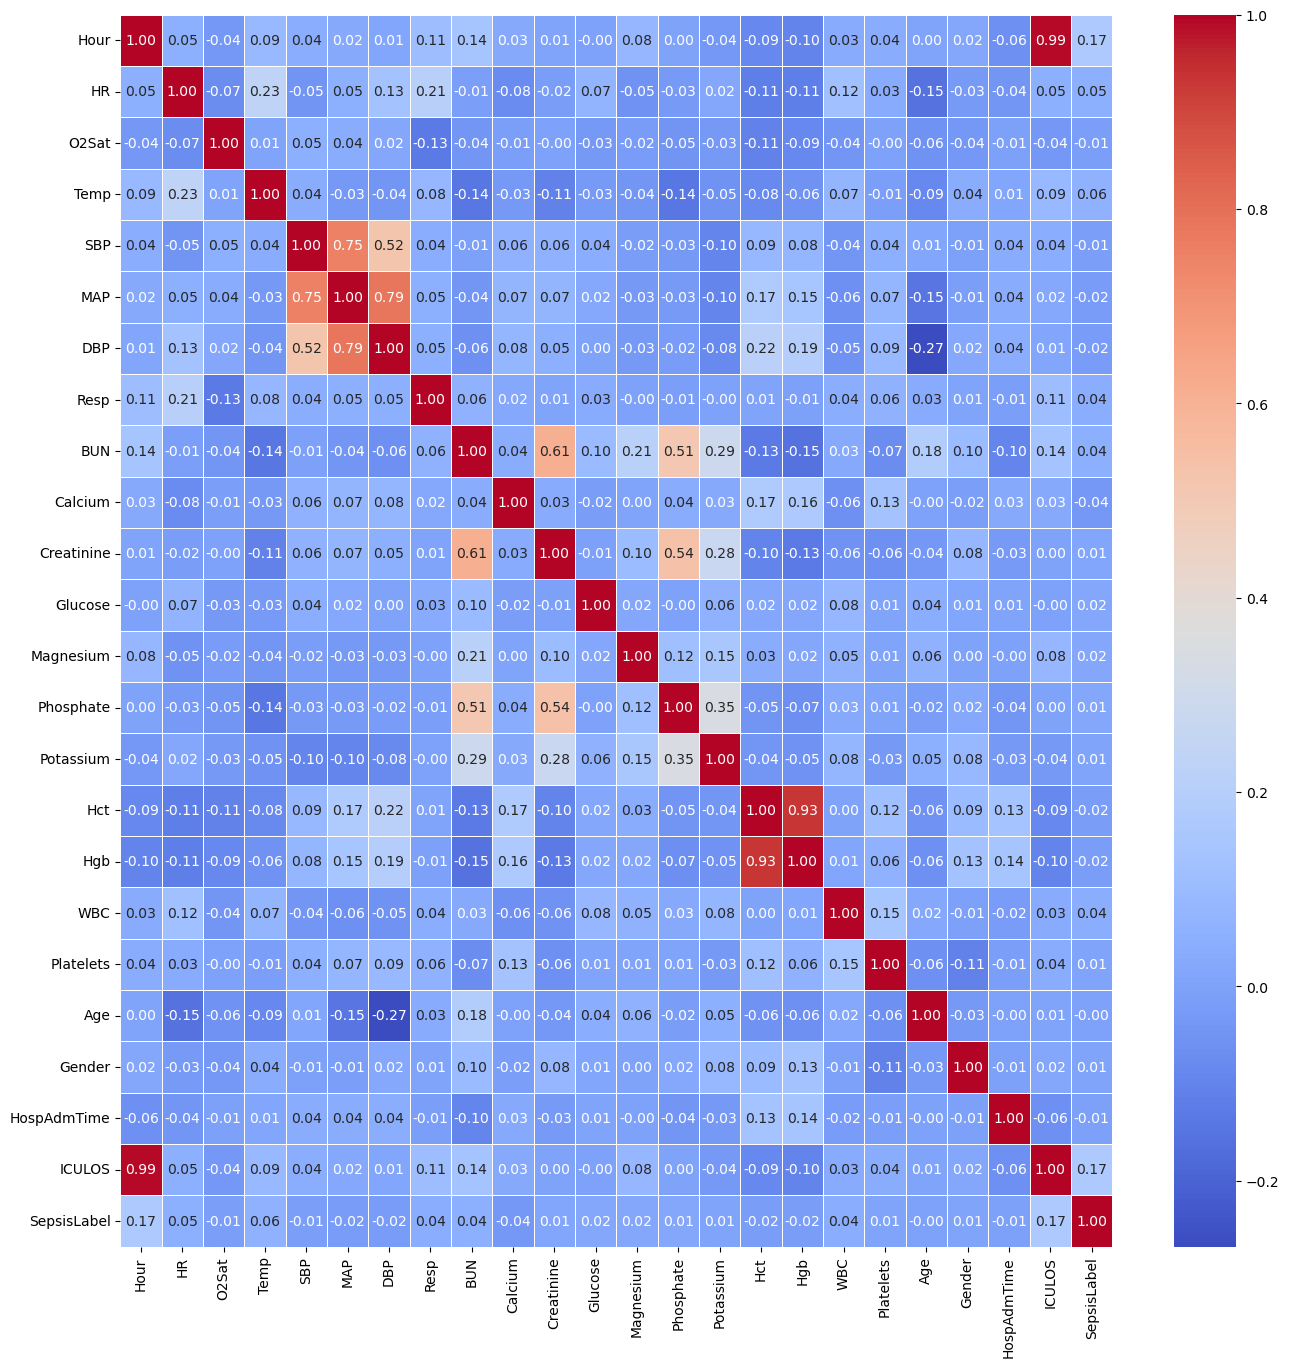

In [83]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", linewidths = .5, cmap='coolwarm')
plt.show()

One of the feature pairs with a correlation of 75% or higher will be removed.

In [85]:
df = df.drop(['MAP', 'Hour', 'Hct'], axis=1)
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'DBP', 'Resp', 'BUN', 'Calcium',
       'Creatinine', 'Glucose', 'Magnesium', 'Phosphate', 'Potassium', 'Hgb',
       'WBC', 'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS',
       'SepsisLabel'],
      dtype='object')

In [87]:
def plot_dist(dataframe):
   
    for col in dataframe.columns:
        if col != '' and col !='SepsisLabel':
            sns.histplot(data=df, x=col, kde=True)
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

In [88]:
#plot_dist(df)

FEATURE SCALING

In [90]:
scaler = StandardScaler()
scaling_columns = ['ICULOS', 'HR', 'O2Sat', 'Temp', 'SBP', 'DBP', 'Resp', 'BUN', 'Calcium',
                'Creatinine', 'Glucose', 'Magnesium', 'Phosphate', 'Potassium', 'Hgb',
                'WBC', 'Platelets', 'Age', 'HospAdmTime']
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

In [91]:
#plot_dist(df)

TRAIN TEST SPLIT

In [98]:
X = df.drop(['SepsisLabel'], axis=1)
y = df.SepsisLabel

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state=42)

UNDERSAMPLING

The rule of thumb for undersampling is this: The test set should never be altered, and undersampling should only be applied to the training set. Otherwise, the results will be misleading.

In [100]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_test.value_counts())
print(y_res.value_counts())

0    662829
1     13704
Name: SepsisLabel, dtype: int64
0    220944
1      4568
Name: SepsisLabel, dtype: int64
0    13704
1    13704
Name: SepsisLabel, dtype: int64


# Modelling

In [97]:
def evaluation(y_true, y_pred):
    
  accuracy = accuracy_score(y_true, y_pred)
  print(f"Accuracy:{accuracy:.4f}")
    
  precision = precision_score(y_true, y_pred)
  print(f"Precision:{precision:.4f}")
    
  recall = recall_score(y_true, y_pred)
  print(f"Recall:{recall:.4f}")
    
  f1 = f1_score(y_true, y_pred)
  print(f"F1 Score:{f1:.4f}")
    
  auc = roc_auc_score(y_true, y_pred)
  print(f"AUC-ROC:{auc:.4f}")
    
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:0.7936
Precision:0.0860
Recall:0.9549
F1 Score:0.1579
AUC-ROC:0.8726


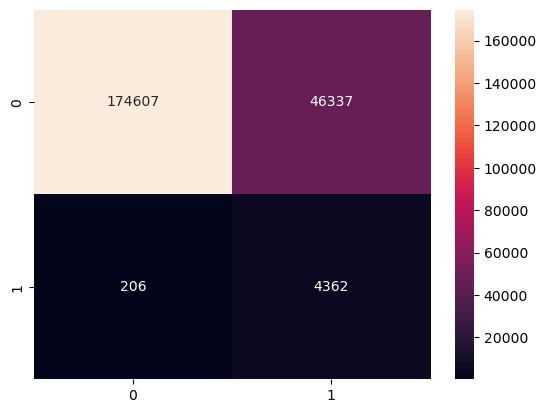

In [66]:
knn_model = KNeighborsClassifier()

#knn_model.fit(X_train, y_train)
knn_model.fit(X_res, y_res)
knn_predictions = knn_model.predict(X_test)
evaluation(y_test,knn_predictions)

Accuracy:0.7936
Precision:0.0621
Recall:0.6513
F1 Score:0.1133
AUC-ROC:0.7239


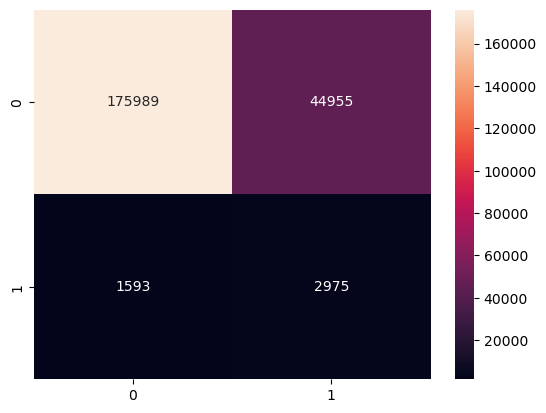

In [67]:
lgr_model = LogisticRegression()
#lgr_model.fit(X_train, y_train)
lgr_model.fit(X_res, y_res)
lgr_predictions = lgr_model.predict(X_test)
evaluation(y_test,lgr_predictions)

Accuracy:0.7938
Precision:0.0624
Recall:0.6543
F1 Score:0.1139
AUC-ROC:0.7255


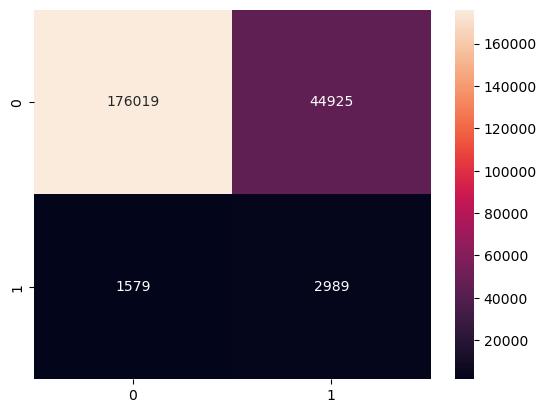

In [42]:
lgr_model2 = LogisticRegression(class_weight='balanced' )
lgr_model2.fit(X_train, y_train)
lgr2_predictions = lgr_model2.predict(X_test)
evaluation(y_test,lgr2_predictions)

Accuracy:0.8185
Precision:0.0828
Recall:0.7901
F1 Score:0.1499
AUC-ROC:0.8046


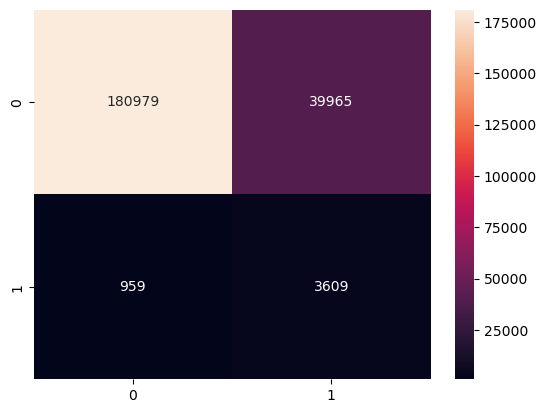

In [43]:
#svc_model = SVC()
#svc_model = SVC(kernel="linear")
#svc_model = SVC(kernel="poly")
#svc_model = SVC(kernel="sigmoid")
svc_model = SVC(kernel="rbf")
#svc_model.fit(X_train, y_train)
svc_model.fit(X_res, y_res)
svc_predictions = svc_model.predict(X_test)
evaluation(y_test,svc_predictions)

Accuracy:0.9099
Precision:0.1813
Recall:0.9816
F1 Score:0.3061
AUC-ROC:0.9450


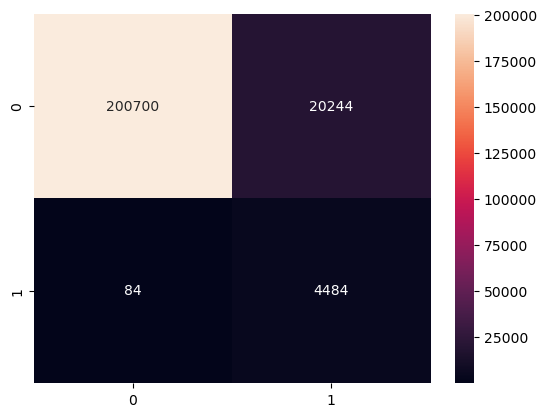

In [44]:
rfc_model = RandomForestClassifier(random_state=42)
#rfc_model.fit(X_train, y_train)
rfc_model.fit(X_res, y_res)
rfc_predictions = rfc_model.predict(X_test)
evaluation(y_test,rfc_predictions)

Accuracy:0.9929
Precision:0.9587
Recall:0.6810
F1 Score:0.7964
AUC-ROC:0.8402


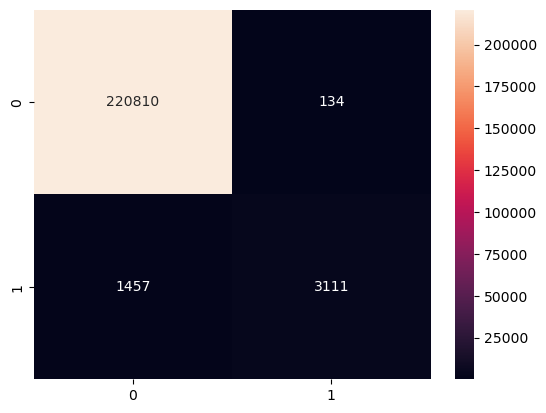

In [45]:
rfc_model2 = RandomForestClassifier(random_state=42, class_weight='balanced')
rfc_model2.fit(X_train, y_train)
rfc2_predictions = rfc_model2.predict(X_test)
evaluation(y_test,rfc2_predictions)

Accuracy:0.8755
Precision:0.1332
Recall:0.9341
F1 Score:0.2331
AUC-ROC:0.9042


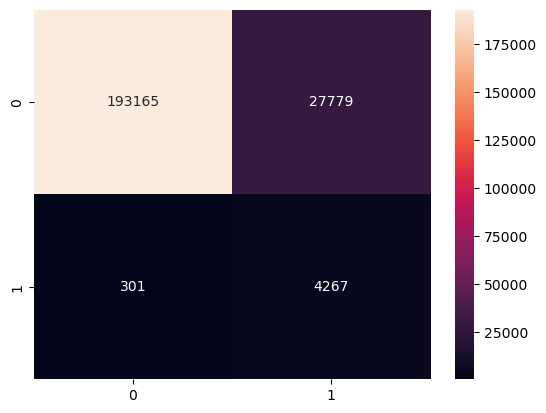

In [40]:
xgb_model = XGBClassifier()
#xgb_model.fit(X_train, y_train)
xgb_model.fit(X_res, y_res)
xgb_predictions = xgb_model.predict(X_test)
evaluation(y_test,xgb_predictions)

In [101]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
scale_pos_weight

48.36755691768827

Accuracy:0.9239
Precision:0.2004
Recall:0.9227
F1 Score:0.3293
AUC-ROC:0.9233


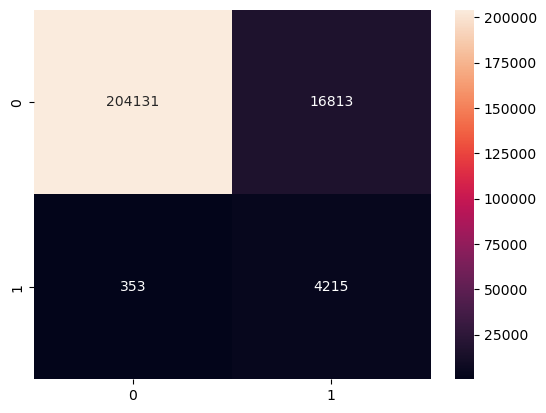

In [44]:
xgb_model2 = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_model2.fit(X_train, y_train)
xgb2_predictions = xgb_model2.predict(X_test)
evaluation(y_test,xgb2_predictions)

# no scale_pos_weight
#Accuracy:0.9833
#Precision:0.8722
#Recall:0.2077
#F1 Score:0.3356
#AUC-ROC:0.6036

[LightGBM] [Info] Number of positive: 13704, number of negative: 13704
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3499
[LightGBM] [Info] Number of data points in the train set: 27408, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy:0.9211
Precision:0.2026
Recall:0.9869
F1 Score:0.3362
AUC-ROC:0.9533


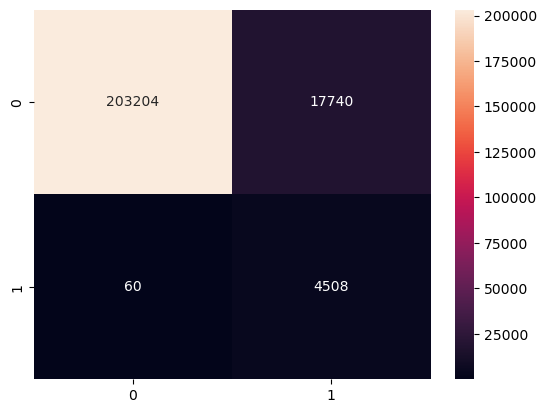

In [58]:
lgbm_model = LGBMClassifier(n_estimators=300, num_leaves=100)
#lgbm_model.fit(X_train, y_train)
lgbm_model.fit(X_res, y_res)
lgbm_predictions = lgbm_model.predict(X_test)
evaluation(y_test, lgbm_predictions)

[LightGBM] [Info] Number of positive: 13704, number of negative: 662829
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4049
[LightGBM] [Info] Number of data points in the train set: 676533, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020256 -> initscore=-3.878829
[LightGBM] [Info] Start training from score -3.878829
Accuracy:0.9745
Precision:0.4415
Recall:0.9744
F1 Score:0.6076
AUC-ROC:0.9745


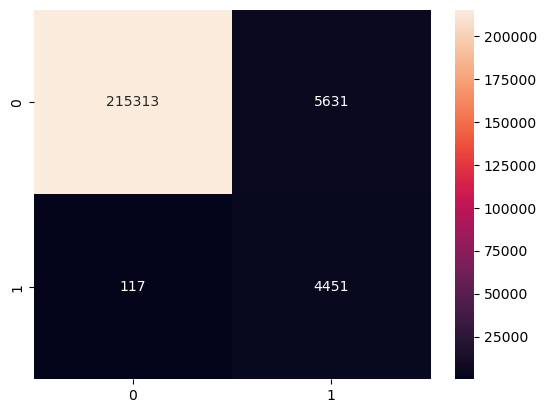

In [59]:
lgbm_model2 = LGBMClassifier(is_unbalance=True, n_estimators=300, num_leaves=100)
lgbm_model2.fit(X_train, y_train)
lgbm2_predictions = lgbm_model2.predict(X_test)
evaluation(y_test, lgbm2_predictions)

# no is_unbalance
#Accuracy:0.9806
#Precision:0.6279
#Recall:0.1075
#F1 Score:0.1836
#AUC-ROC:0.5531

In [102]:
sKFold = StratifiedKFold(n_splits=4, shuffle=False)#Default Parameters

In [52]:
sKFold_rec = cross_val_score(xgb_model2, X_res, y_res, cv=sKFold, scoring='recall')
print(sKFold_rec)
print(sKFold_rec.mean())

[0.99678926 0.99620549 0.99532983 0.99678926]
0.9962784588441331


# Hyperparameter Tuning

Precision and Recall metrics are both important, but recall is more important for this project. Therefore f2_score will be used in the GridSearch scoring parameter. 

In [103]:
f2 = make_scorer(fbeta_score, beta=2)

Random Forest

In [107]:
rfc_optimized_model = RandomForestClassifier()

In [108]:
rfc_param_grid = {
    'random_state':[42],
    'n_estimators': [100, 200, 300, 400],
    'min_samples_split': [2, 4, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 15, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [109]:
rfc_grid_search = GridSearchCV(estimator=rfc_optimized_model, param_grid=rfc_param_grid, cv=sKFold, scoring=f2, n_jobs=-1)
rfc_grid_search.fit(X_res, y_res)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 15, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [100, 200, 300, 400],
                         'random_state': [42]},
             scoring=make_scorer(fbeta_score, beta=2))

In [110]:
print("Best parameters:", rfc_grid_search.best_params_)
print("Best Score (CV f2):", rfc_grid_search.best_score_)

Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400, 'random_state': 42}
Best Score (CV f2): 0.9537859005377494


Accuracy:0.9103
Precision:0.1822
Recall:0.9820
F1 Score:0.3073
AUC-ROC:0.9455


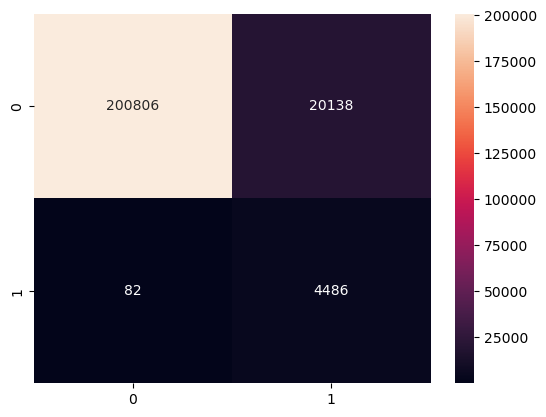

In [111]:
rfc_best_model = rfc_grid_search.best_estimator_
rfc_optimized_predictions = rfc_best_model.predict(X_test)
evaluation(y_test,rfc_optimized_predictions)

XGBoost(With X_train, y_train)

In [72]:
xgb_optimized_model = XGBClassifier()

In [73]:
xgb_param_grid = {
        'scale_pos_weight' : [scale_pos_weight],
        'n_estimators': [100, 500, 750, 1000],
        'gamma': [0, 1, 5],
        'subsample': [0.7, 0.9], 
        'max_depth': [6, 8, 10], 
        'learning_rate': [0.2, 0.3],
        'min_child_weight': [1, 2]
}

In [74]:
xgb_grid_search = GridSearchCV(estimator=xgb_optimized_model, param_grid=xgb_param_grid, cv=sKFold, scoring=f2, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 1, 5],

In [75]:
print("Best parameters:", xgb_grid_search.best_params_)
print("Best Score (CV f2):", xgb_grid_search.best_score_)

Best parameters: {'gamma': 1, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 1000, 'scale_pos_weight': 48.36755691768827, 'subsample': 0.9}
Best Score (CV f2): 0.8965412075202397


Accuracy:0.9949
Precision:0.8230
Recall:0.9560
F1 Score:0.8845
AUC-ROC:0.9759


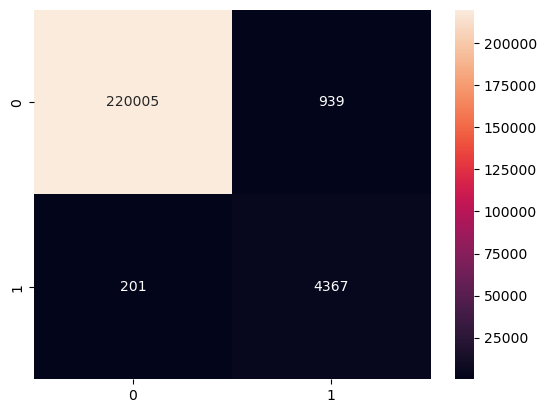

In [76]:
xgb_best_model = xgb_grid_search.best_estimator_
xgb_optimized_predictions = xgb_best_model.predict(X_test)
evaluation(y_test,xgb_optimized_predictions)

LightGBM(With X_res, y_res)

In [77]:
lgbm_optimized_model = LGBMClassifier()

In [78]:
lgbm_param_grid = {
    'n_estimators': [100, 250, 400],
    'num_leaves': [31, 100, 200],
    'learning_rate': [0.05, 0.1],
    'subsample' : [0.7, 0.9],
    'max_depth': [-1, 10, 20]
}

In [79]:
lgbm_grid_search = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_param_grid, cv=sKFold, scoring=f2, n_jobs=-1)
lgbm_grid_search.fit(X_res, y_res)

[LightGBM] [Info] Number of positive: 13704, number of negative: 13704
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3499
[LightGBM] [Info] Number of data points in the train set: 27408, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LGBMClassifier(n_estimators=400, num_leaves=100),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'max_depth': [-1, 10, 20],
                         'n_estimators': [100, 250, 400],
                         'num_leaves': [31, 100, 200],
                         'subsample': [0.7, 0.9]},
             scoring=make_scorer(fbeta_score, beta=2))

In [80]:
print("Best parameters:", lgbm_grid_search.best_params_)
print("Best Score (CV f2):", lgbm_grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 400, 'num_leaves': 200, 'subsample': 0.7}
Best Score (CV f2): 0.9711370714513625


Accuracy:0.9336
Precision:0.2328
Recall:0.9921
F1 Score:0.3771
AUC-ROC:0.9623


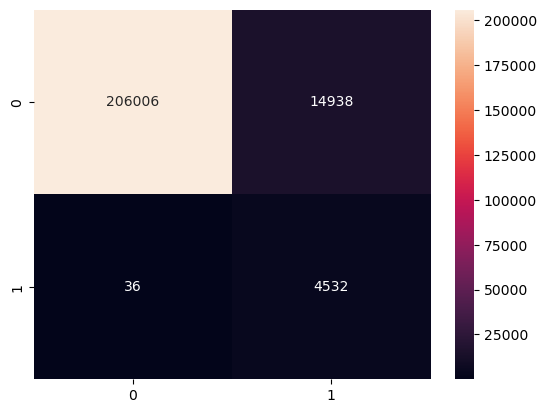

In [81]:
lgbm_best_model = lgbm_grid_search.best_estimator_
lgbm_predictions = lgbm_best_model.predict(X_test)
evaluation(y_test, lgbm_predictions)

LighGBM(With X_train, y_train)

In [82]:
lgbm_optimized_model2 = LGBMClassifier()

In [83]:
lgbm_param_grid2 = {
    'n_estimators': [100, 500, 750, 1000],
    'num_leaves': [31, 100, 250, 500],
    'learning_rate': [0.05, 0.1],
    'subsample' : [0.7, 0.9],
    'max_depth': [-1, 15, 30],
    'is_unbalance': [True]
}

In [84]:
lgbm_grid_search2 = GridSearchCV(estimator=lgbm_optimized_model2, param_grid=lgbm_param_grid2, cv=sKFold, scoring=f2, n_jobs=-1)
lgbm_grid_search2.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 13704, number of negative: 662829
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4049
[LightGBM] [Info] Number of data points in the train set: 676533, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020256 -> initscore=-3.878829
[LightGBM] [Info] Start training from score -3.878829


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'is_unbalance': [True], 'learning_rate': [0.05, 0.1],
                         'max_depth': [-1, 15, 30],
                         'n_estimators': [100, 500, 750, 1000],
                         'num_leaves': [31, 100, 250, 500],
                         'subsample': [0.7, 0.9]},
             scoring=make_scorer(fbeta_score, beta=2))

In [85]:
print("Best parameters:", lgbm_grid_search2.best_params_)
print("Best Score (CV f2):", lgbm_grid_search2.best_score_)

Best parameters: {'is_unbalance': True, 'learning_rate': 0.05, 'max_depth': 30, 'n_estimators': 750, 'num_leaves': 250, 'subsample': 0.7}
Best Score (CV f2): 0.9111029253568768


Accuracy:0.9951
Precision:0.8229
Recall:0.9641
F1 Score:0.8879
AUC-ROC:0.9799


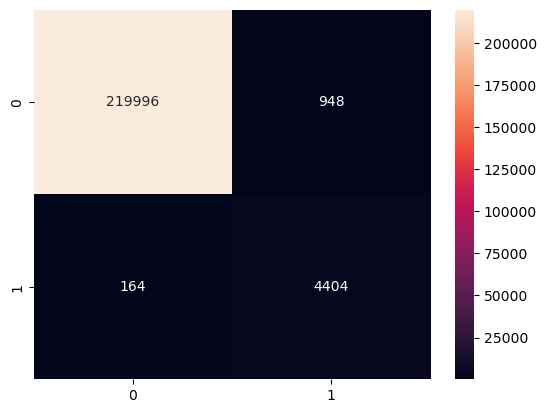

In [86]:
lgbm_best_model2 = lgbm_grid_search2.best_estimator_
lgbm2_predictions = lgbm_best_model2.predict(X_test)
evaluation(y_test, lgbm2_predictions)